In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

from joblib import Parallel

from useful_func import *

import CSLtools.CSLtools as CSLtools

from skimage.transform import rescale, resize, downscale_local_mean
import skimage
from scipy.ndimage import binary_erosion


import tifffile as tiff
from tqdm import tqdm

sigma_480 = 198 #m2/mol
sigma_405 = 415 #m2/mol
tau_relax = 0.014

import click


import incense
from incense import ExperimentLoader

#source: incense github page

def get_mongo_uri():
    in_devcontainer = (
        os.environ.get("TERM_PROGRAM") == "vscode"
        or os.environ.get("HOME") == "/home/vscode"
        or (os.environ.get("PATH") or "").startswith("/home/vscode")
    )
    if in_devcontainer:
        return "mongodb://mongo:27017"
    else:
        return None



loader = ExperimentLoader(
    mongo_uri=get_mongo_uri(), 
    db_name='sacred'
)

#%matplotlib widget

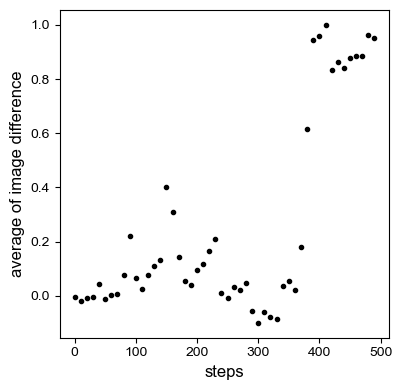

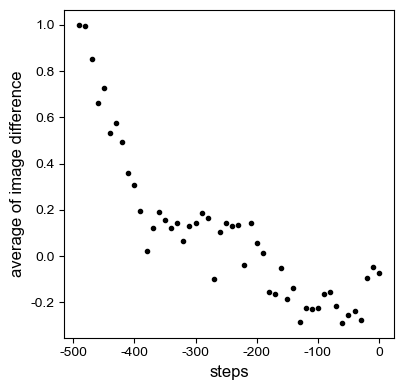

In [39]:
for idi in 192, 196:
    exp = loader.find_by_id(idi)
    df = exp.metrics['blur']
    x, y = df.index.values, df.values
    fig = CSLtools.set_figure("%d", "%0.1f")
    plt.plot(x, y/y.max(), '.k')

    plt.xlabel("steps")
    plt.ylabel("average of image difference")
    
    if np.mean(x)<0:
        plt.savefig("results/backlash_negative")
    else:
        plt.savefig("results/backlash_positive")
    

C:\Users\alien\AppData\Local\Temp\ipykernel_26092\2041092220.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(f)


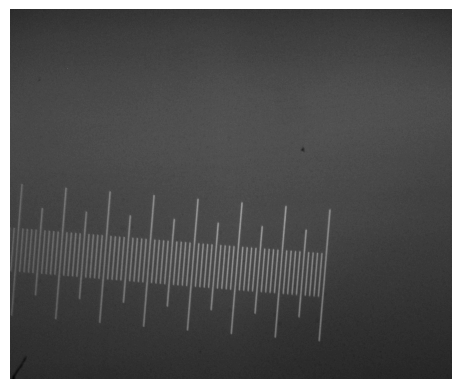

In [57]:
exp = loader.find_by_id(191)
f = exp.artifacts["focus_image.png"].file
import imageio
im = imageio.imread(f)
plt.axis('off')
plt.imshow(im, cmap = 'gray')
plt.savefig("results/focus_image.pdf", bbox_inches = 'tight')

C:\Users\alien\AppData\Local\Temp\ipykernel_26092\571485951.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(f)


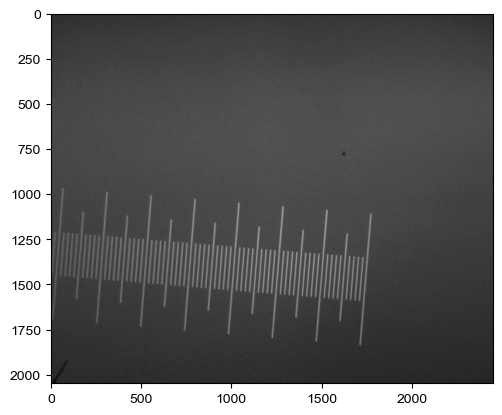